In [33]:
## 1. Setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [34]:
# Configuration
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [35]:

DATA_PATH = "full_history_features_real_weather.csv"

In [36]:
# Load Data
if os.path.exists(DATA_PATH):
    df = pd.read_csv(DATA_PATH)
    df['Date'] = pd.to_datetime(df['Date'])
    print("Data loaded successfully.")
    print(df.head())
else:
    print(f"Data not found at {DATA_PATH}")

Data loaded successfully.
        Date  market  item   price  temp  rainfall  humidity  wind_speed  \
0 2020-01-01  Ampara  Rice  148.61  26.3       3.4      87.0        13.7   
1 2020-01-02  Ampara  Rice  149.19  26.3       5.6      89.0        12.2   
2 2020-01-03  Ampara  Rice  149.17  26.5       2.7      86.0        14.8   
3 2020-01-04  Ampara  Rice  149.01  26.2       0.7      86.0        11.8   
4 2020-01-05  Ampara  Rice  148.87  26.3       0.8      84.0        13.5   

   sunshine_hours  is_holiday holiday_name  
0       10.882636           0          NaN  
1        9.672189           0          NaN  
2       10.868742           0          NaN  
3       10.862022           0          NaN  
4       10.855483           0          NaN  


In [37]:
"""
## 2. General Overview
"""
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72604 entries, 0 to 72603
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            72604 non-null  datetime64[ns]
 1   market          72604 non-null  object        
 2   item            72604 non-null  object        
 3   price           72604 non-null  float64       
 4   temp            29469 non-null  float64       
 5   rainfall        29469 non-null  float64       
 6   humidity        29469 non-null  float64       
 7   wind_speed      29469 non-null  float64       
 8   sunshine_hours  29469 non-null  float64       
 9   is_holiday      72604 non-null  int64         
 10  holiday_name    989 non-null    object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(3)
memory usage: 6.1+ MB
None

Missing Values:
 Date                  0
market                0
item                  0
price                 0
temp           

In [38]:
# Crops and Markets
print("Crops:", df['item'].unique())
print("Markets:", df['market'].unique())

Crops: ['Rice' 'Beetroot' 'Red Onion' 'Radish']
Markets: ['Ampara' 'Anuradhapura' 'Bandarawela' 'Batticaloa' 'Colombo' 'Dambulla'
 'Embilipitiya' 'Jaffna' 'Kandy' 'Kurunegala' 'Mannar' 'Meegoda'
 'Moneragala' 'Mulathiv' 'Mullaittivu' 'Nuwara Eliya' 'Nuwaraeliya'
 'Polonnaruwa' 'Puttalam' 'Thambuththegama' 'Trincomalee' 'Vavuniya']


In [39]:
# Aggregate by Date and Item
daily_avg = df.groupby(['Date', 'item'])['price'].mean().reset_index()

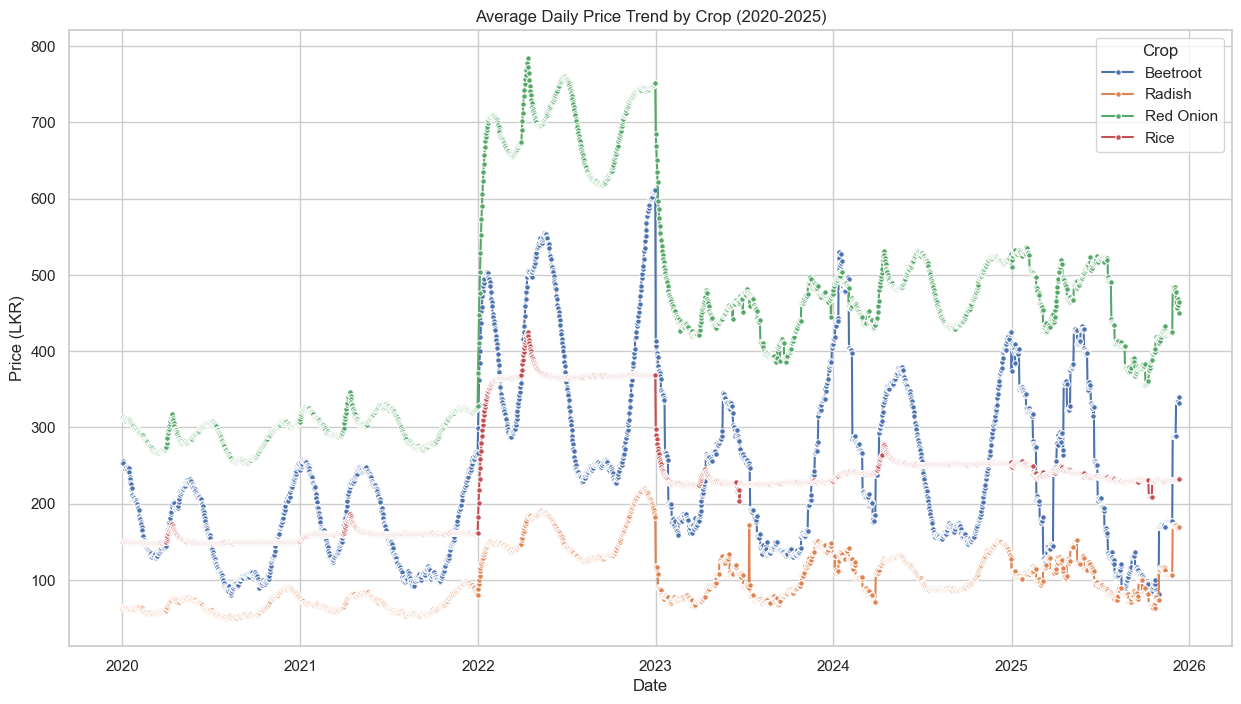

In [40]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=daily_avg, x='Date', y='price', hue='item', marker='o', markersize=4)
plt.title("Average Daily Price Trend by Crop (2020-2025)")
plt.ylabel("Price (LKR)")
plt.xlabel("Date")
plt.legend(title="Crop")
plt.show()

In [41]:
"""
## 4. Market Variance (Spatial Analysis)
How much does the price vary between markets for the same crop?
Let's pick 'Red Onion' as an example (highly volatile).
"""
target_crop = "Red Onion"
crop_df = df[df['item'] == target_crop]

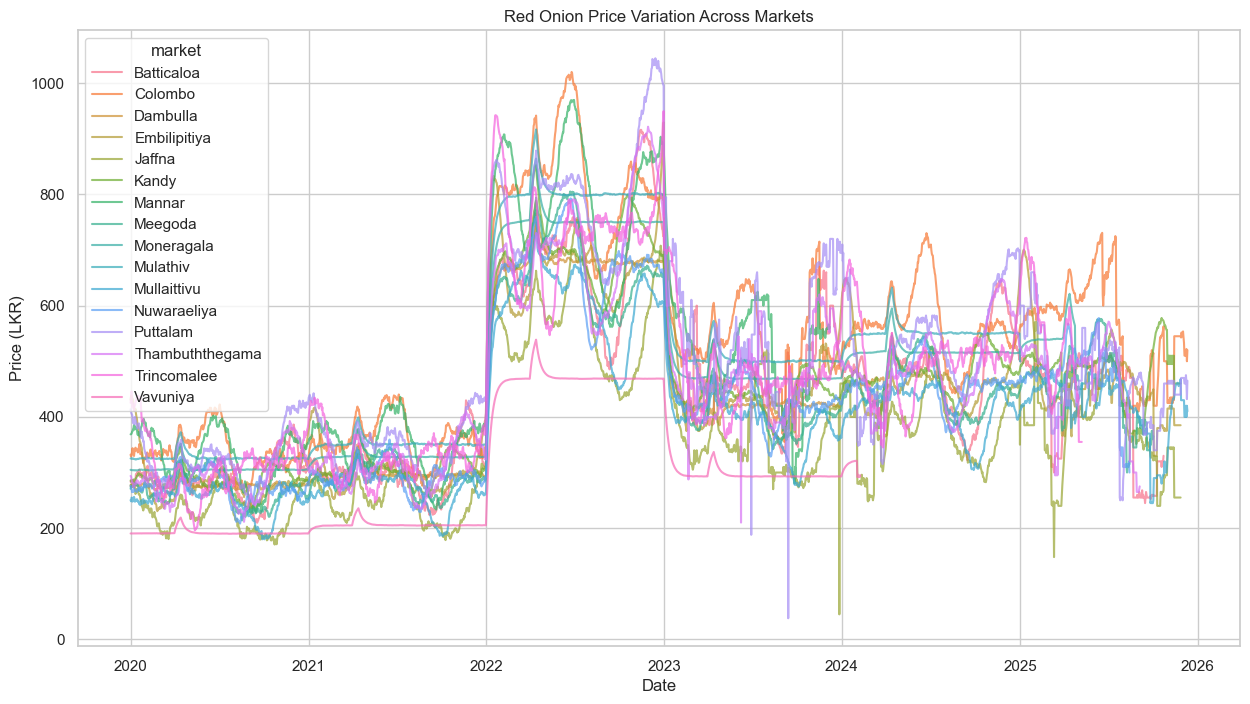

In [42]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=crop_df, x='Date', y='price', hue='market', alpha=0.7)
plt.title(f"{target_crop} Price Variation Across Markets")
plt.ylabel("Price (LKR)")
plt.show()

In [43]:
"""
## 5. Seasonality Analysis
Let's look at monthly averages to spot seasonal patterns.
"""
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [44]:
monthly_avg = df.groupby(['month', 'item'])['price'].mean().reset_index()

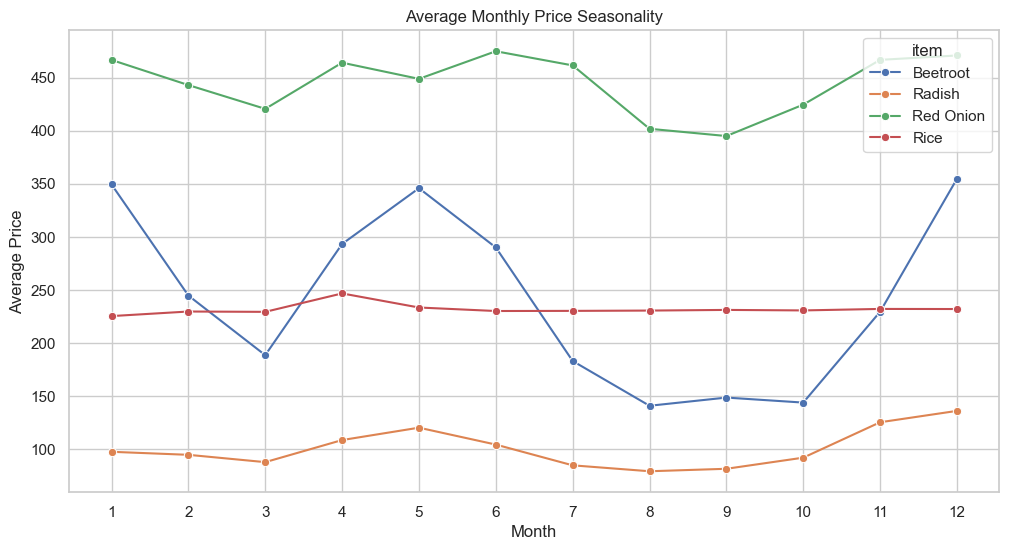

In [45]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg, x='month', y='price', hue='item', marker='o')
plt.title("Average Monthly Price Seasonality")
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

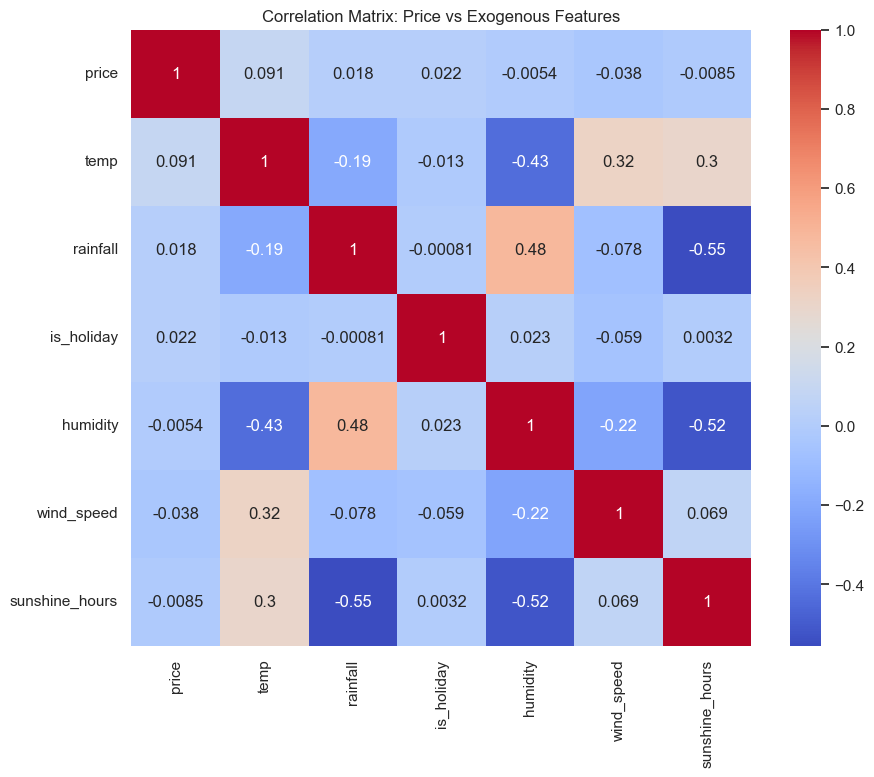

In [49]:
"""
## 6. Weather & Holiday Analysis (New)
Correlation analysis between Weather, Holidays, and Price.
"""
plt.figure(figsize=(10, 8))
corr_cols = ['price', 'temp', 'rainfall', 'is_holiday','humidity','wind_speed','sunshine_hours']
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix: Price vs Exogenous Features")
plt.show()